# Data Algorithms

## 1. K-Means Clustering

### 1.1 Description

As stated on Wikipedia
> Given a set of observations $(\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n)$, where each observation is a *d*-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k$ ($\leq n$) sets $\mathbf{S}= \{S_1, S_2, \ldots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center). In other words, its objective is to find:
>
>$\begin{equation}\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2\end{equation}$
>
>where $\boldsymbol\mu_i$ is the mean of points in $S_i$.


### 1.2 Algorithm

1. Initialize cluster centroids $\boldsymbol\mu_1, \boldsymbol\mu_2, \ldots, \boldsymbol\mu_k \in \mathbb{R}^n$ randomly
2. Repeat until convergence:  
  2.1 For every $i$, set $y_i = \underset{j}{\arg\min} \|\mathbf{x}_i - \boldsymbol\mu_j\|^2$  
  2.2 For each $j$, set $\boldsymbol\mu_j = \frac{1}{\sum_i^n1\{y_i = j\}}\sum_i^n1\{y_i = j\}\mathbf{x}_i$

### 1.3 Objective

Write the k-means algorithm using [Spark's RDD API](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD).

### 1.4 Dataset

To test our algorithm, we will generate a 2D dataset using [scikit-learn](http://scikit-learn.org/stable/datasets/index.html#sample-generators). 

In [25]:
import numpy
from sklearn.datasets import make_blobs
numpy.random.seed(20)

In [26]:
N_SAMPLES = 10**5
N_FEATURES= 2
N_CENTERS = 4
STD = 2.0
BOX = (-100.0, 100.0)
features, tlabels = make_blobs(n_samples=N_SAMPLES, 
                               n_features=N_FEATURES, 
                               centers=N_CENTERS, 
                               cluster_std=STD, 
                               center_box=BOX)

Since we are working first with a 2D example, we can plot the blobs.

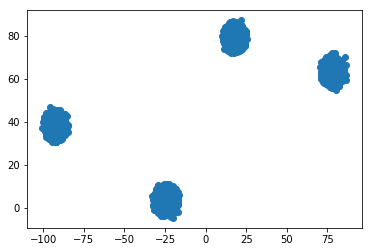

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(features[:, 0], features[:, 1])

We then create an RDD by parallelizing the features. Since, we will iterate on multiple time on the data, we will benefit from caching it in memory.

In [ ]:
import pyspark
sc = pyspark.SparkContext()

In [ ]:
rdd = sc.parallelize(features).cache()

### 1.5 Implementation

In [ ]:
def compute_label(point, centroids):
    """Return the label of the closest centroid."""
    return <FILL_IN>

Implement the following algorithm with pyspark:
0. Compute dataset bounding box
1. Initialize cluster centroids
2. Repeat until convergence:
  1. Compute label for each points
  2. Update centroids
3. Return the final centroids

In [ ]:
def kmeans(rdd, n_centers, n_iter):
    <FILL_IN>

Test your algorithm on the dataset

In [ ]:
kmeans(<FILL IN>)

### 1.6 Compare with MLlib Implementation

In [ ]:
from pyspark.mllib.clustering import KMeans

In [ ]:
clusters = KMeans.train(rdd, N_CENTERS, maxIterations=10, initializationMode="random")
clusters.centers

## 2. Recommending Friends

This exercise draws heavily from Washington University course CS140: Data Programming's [Homework 4: Social networking and recommendation systems](https://courses.cs.washington.edu/courses/cse140/13wi/homework/hw4/homework4.html).

###  2.1 Description

Social network websites (Facebook, Twitter, LinkedIn) suggest person you should be connected (or friend) with. How do they do that?

A social network can be represented as a graph. Persons are represented as nodes or vertices, and the relationships are represented as edges. An edge between person A and person B means that A considers B a friend, and also B considers A a friend.

### 2.2 Objective

For user X, list some non-friends in order, starting with the best friend recommendation and ending with the worst.

### 2.3 Algorithm

If non-friend Y is your friend's friend, then maybe Y should be your friend too. If person Y is the friend of many of your friends, then Y is an even better recommendation. The best friend recommendation is the person with whom you have the largest number of mutual friends. You will implement this heuristic.

### 2.4 Dataset

In this exercise, you will start from the dataset "[Social characteristics of the Marvel Universe](http://bioinfo.uib.es/~joemiro/marvel.html)" which represents a list of relationships between characters in the [Marvel Universe](http://marvel.com/universe/Main_Page). 

From this dataset you should be able to infer a graph and determine friend recommendations.

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [ ]:
df = sqlContext.read.format('csv')\
               .options(inferschema=False, header=False)\
               .load(DATA_PATH + 'data/marvel/hero-network.csv')\
               .distinct().cache()

### 2.5 Implementation

## 3. References

- [edX - Scalable Machine Learning Course](https://www.edx.org/course/scalable-machine-learning-uc-berkeleyx-cs190-1x)
- [edX - Scalable Machine Learnig Notebboks](https://github.com/spark-mooc/mooc-setup)